In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we will ignore pandas warning 
import warnings
warnings.filterwarnings('ignore')

In [206]:
ordersExport = pd.read_csv('orders_export.csv')
productsExport = pd.read_csv('products_export.csv')

In [207]:
df_order = ordersExport[['Name', 'Lineitem quantity', 'Lineitem name', 'Lineitem sku']]
print(df_order.shape)
df_order.head()

(118, 4)


,Name,Lineitem quantity,Lineitem name,Lineitem sku
0,#2891,1,Betwa Kurta - XL,HOD0011
1,#2891,1,Bhagirathi pants - XXL,HOD0444
2,#2891,1,Kosi Kurta - XL,HOD0005
3,#2892,1,Panzara kurta - XXL,HOD0126
4,#2893,1,Betwa Kurta - S,HOD0008


In [208]:
productsExport = productsExport[productsExport['Tags'].isnull() == False]
productsExport = productsExport[productsExport['Published'] == True]
print(productsExport.shape)
productsExport.head(2)

(134, 49)


,Handle,Title,Body (HTML),Vendor,Standardized Product Type,Custom Product Type,Tags,Published,Option1 Name,Option1 Value,...,Google Shopping / Custom Label 0,Google Shopping / Custom Label 1,Google Shopping / Custom Label 2,Google Shopping / Custom Label 3,Google Shopping / Custom Label 4,Variant Image,Variant Weight Unit,Variant Tax Code,Cost per item,Status
0,ishya-blockprinted-kurta-set,Ishya Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active
10,ahaana-blockprinted-kurta-set,Ahaana Blockprinted Kurta (Set of 2),"<p data-mce-fragment=""1""><strong data-mce-frag...",House Of Dhaaga,NaN,Kurta Sets,"Category_Kurta Sets, Category_Women, Collectio...",True,Size,XS,...,NaN,NaN,NaN,NaN,NaN,NaN,kg,NaN,NaN,active


In [209]:
df_product = productsExport[['Handle', 'Title', 'Tags', 'Image Src', 'Variant SKU']]
df_product = df_product.rename(columns={'Image Src': 'image'})
print(df_product.shape)
df_product.head()

(134, 5)


,Handle,Title,Tags,image,Variant SKU
0,ishya-blockprinted-kurta-set,Ishya Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772
10,ahaana-blockprinted-kurta-set,Ahaana Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766
21,seher-blockprinted-kurta-set,Seher Blockprinted Kurta (Set of 2),"Category_Kurta Sets, Category_Women, Collectio...",https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760
29,mihira-blockprinted-kurta-set,Mihira Blockprinted Kurta (Set of 3),"Category_Kurta Sets, Category_Women, Collectio...",https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754
41,bahar-blockprinted-kurta-set,Bahar Blockprinted Kurta (Set of 3),"Category_Kurta Sets, Category_Women, Collectio...",https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748


In [210]:
aprioriproduct = df_product

In [211]:
final_product = df_product

In [212]:
final_product['Handle'] = final_product['Handle'].apply(lambda x: [str.lower(i.replace("-", "")) for i in x])
final_product['Handle'] = final_product['Handle'].apply(lambda x: ''.join(x))
final_product['Handle']

0           ishyablockprintedkurtaset
10         ahaanablockprintedkurtaset
21          seherblockprintedkurtaset
29         mihirablockprintedkurtaset
41          baharblockprintedkurtaset
                    ...              
844            alinewhiteandbluekurta
850    longstraightpeachandwhitekurta
856            longstraightwhitekurta
862            straightbluewhitekurta
868                    peachfuldesire
Name: Handle, Length: 134, dtype: object

In [213]:
final_product['Title'] = final_product['Title'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
final_product['Title'] = final_product['Title'].apply(lambda x: ''.join(x))
final_product['Title'][0:10]

0      ishyablockprintedkurta(setof2)
10    ahaanablockprintedkurta(setof2)
21     seherblockprintedkurta(setof2)
29    mihirablockprintedkurta(setof3)
41     baharblockprintedkurta(setof3)
55      keyablockprintedkurta(setof3)
70                         ektakaftan
76                        barnakaftan
82                   saukhayadakaftan
88                       chesnakaftan
Name: Title, dtype: object

In [214]:
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace("_", "")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: ''.join(x))
final_product['Tags'] = final_product['Tags'].apply(lambda x: [str.lower(i.replace(",", " ")) for i in x])
final_product['Tags'] = final_product['Tags'].apply(lambda x: ''.join(x))
final_product['Tags'][0]

'categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k'

In [215]:
final_product['description'] = final_product['Handle'] + " " + final_product['Title'] + " " + final_product['Tags']
final_product['description'] = final_product['description'].fillna('')
final_product['description'][0]

'ishyablockprintedkurtaset ishyablockprintedkurta(setof2) categorykurtasets categorywomen collectionrozana kurtaforwomen necktypevneck price3kto4k'

In [216]:
final_product = final_product[['Variant SKU', 'description']]
final_product.head()

,Variant SKU,description
0,HOD0772,ishyablockprintedkurtaset ishyablockprintedkur...
10,HOD0766,ahaanablockprintedkurtaset ahaanablockprintedk...
21,HOD0760,seherblockprintedkurtaset seherblockprintedkur...
29,HOD0754,mihirablockprintedkurtaset mihirablockprintedk...
41,HOD0748,baharblockprintedkurtaset baharblockprintedkur...


In [217]:
df_merge = df_order.merge(final_product, how='inner', left_on='Lineitem sku', right_on='Variant SKU')
df_merge['Name'] = df_merge['Name'].str.replace('#', '')
print(df_merge.shape)
df_merge.head()

(32, 6)


,Name,Lineitem quantity,Lineitem name,Lineitem sku,Variant SKU,description
0,2898,1,Green Car Cotton Shirt - S,HOD0607,HOD0607,greencarcottonshirt greencarcottonshirt catego...
1,2898,1,Light Blue Cotton Shirt - S,HOD0575,HOD0575,lightbluecottonshirt lightbluecottonshirt cate...
2,2932,1,Light Blue Cotton Shirt - S,HOD0575,HOD0575,lightbluecottonshirt lightbluecottonshirt cate...
3,2898,1,Olive Green Cotton Shirt - S,HOD0579,HOD0579,olivegreencottonshirt olivegreencottonshirt ca...
4,2898,1,Red Flower Cotton Shirt - S,HOD0615,HOD0615,redflowercottonshirt redflowercottonshirt cate...


In [218]:
final = df_merge[['Name', 'Variant SKU', 'Lineitem quantity', 'description']]
final.head()

,Name,Variant SKU,Lineitem quantity,description
0,2898,HOD0607,1,greencarcottonshirt greencarcottonshirt catego...
1,2898,HOD0575,1,lightbluecottonshirt lightbluecottonshirt cate...
2,2932,HOD0575,1,lightbluecottonshirt lightbluecottonshirt cate...
3,2898,HOD0579,1,olivegreencottonshirt olivegreencottonshirt ca...
4,2898,HOD0615,1,redflowercottonshirt redflowercottonshirt cate...


In [219]:
group = final.groupby(['Name', 'Variant SKU']).sum().reset_index()
group.head()

,Name,Variant SKU,Lineitem quantity
0,2898,HOD0575,1
1,2898,HOD0579,1
2,2898,HOD0607,1
3,2898,HOD0615,1
4,2898,HOD0635,1


In [220]:
#Turn raw data to pivot ('ratings' matrix)
ratings = group.pivot(index = 'Name', columns='Variant SKU', values='Lineitem quantity').fillna(0).astype('int')
ratings

Variant SKU,HOD0007,HOD0031,HOD0037,HOD0079,HOD0103,HOD0157,HOD0217,HOD0229,HOD0271,HOD0397,...,HOD0607,HOD0615,HOD0631,HOD0635,HOD0647,HOD0742,HOD0748,HOD0754,HOD0766,HOD0772
Name,,,,,,,,,,,,,,,,,,,,,
2898,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2929,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [221]:
#Binarize the ratings matrix (indicate only if a customer has purchased a product or not)
ratings_binary = ratings.copy()
ratings_binary[ratings_binary != 0] = 1

In [222]:
ratings_binary

Variant SKU,HOD0007,HOD0031,HOD0037,HOD0079,HOD0103,HOD0157,HOD0217,HOD0229,HOD0271,HOD0397,...,HOD0607,HOD0615,HOD0631,HOD0635,HOD0647,HOD0742,HOD0748,HOD0754,HOD0766,HOD0772
Name,,,,,,,,,,,,,,,,,,,,,
2898,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2909,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2929,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1


In [223]:
#!pip install mlxtend

In [224]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [225]:
frequent_itemset = apriori(ratings_binary, min_support=0.04, use_colnames=True)

In [226]:
frequent_itemset.head()

,support,itemsets
0,0.076923,(HOD0007)
1,0.076923,(HOD0031)
2,0.076923,(HOD0037)
3,0.153846,(HOD0079)
4,0.076923,(HOD0103)


In [227]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [228]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HOD0031),(HOD0007),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
1,(HOD0007),(HOD0031),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
2,(HOD0007),(HOD0217),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
3,(HOD0217),(HOD0007),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
4,(HOD0031),(HOD0217),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf


In [229]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HOD0031),(HOD0007),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
598,"(HOD0635, HOD0607, HOD0575)",(HOD0615),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
586,"(HOD0635, HOD0575, HOD0615)",(HOD0579),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
587,"(HOD0579, HOD0575, HOD0615)",(HOD0635),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
588,"(HOD0635, HOD0579)","(HOD0575, HOD0615)",0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf


In [230]:
df_rec = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'HOD0031')]

In [231]:
df_rec.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HOD0031),(HOD0007),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
4,(HOD0031),(HOD0217),0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf
87,(HOD0031),"(HOD0007, HOD0217)",0.076923,0.076923,0.076923,1.0,13.0,0.071006,inf


In [232]:
antecedentlist = []
for i in df_res['antecedents']:
    antecedentlist.append(list(i))
print(antecedentlist)

[['HOD0031'], ['HOD0635', 'HOD0607', 'HOD0575'], ['HOD0635', 'HOD0575', 'HOD0615'], ['HOD0579', 'HOD0575', 'HOD0615'], ['HOD0635', 'HOD0579'], ['HOD0635', 'HOD0575'], ['HOD0635', 'HOD0615'], ['HOD0579', 'HOD0575'], ['HOD0579', 'HOD0615'], ['HOD0575', 'HOD0615'], ['HOD0635'], ['HOD0579'], ['HOD0615'], ['HOD0635', 'HOD0575', 'HOD0615'], ['HOD0229', 'HOD0037', 'HOD0772'], ['HOD0607', 'HOD0575', 'HOD0615'], ['HOD0635', 'HOD0607'], ['HOD0635', 'HOD0575'], ['HOD0635', 'HOD0615'], ['HOD0607', 'HOD0575'], ['HOD0607', 'HOD0615'], ['HOD0575', 'HOD0615'], ['HOD0635'], ['HOD0607'], ['HOD0615'], ['HOD0635', 'HOD0607', 'HOD0579'], ['HOD0635', 'HOD0579', 'HOD0575'], ['HOD0579'], ['HOD0607'], ['HOD0635'], ['HOD0754'], ['HOD0742'], ['HOD0607', 'HOD0579', 'HOD0575'], ['HOD0607', 'HOD0575', 'HOD0615'], ['HOD0579', 'HOD0575', 'HOD0615'], ['HOD0607', 'HOD0579'], ['HOD0607', 'HOD0575'], ['HOD0607', 'HOD0615'], ['HOD0579', 'HOD0575'], ['HOD0579', 'HOD0615'], ['HOD0575', 'HOD0615'], ['HOD0607'], ['HOD0579'], 

In [233]:
antlist = []
for i in antecedentlist:
    for j in i:
        antlist.append(j)
print(antlist)

['HOD0031', 'HOD0635', 'HOD0607', 'HOD0575', 'HOD0635', 'HOD0575', 'HOD0615', 'HOD0579', 'HOD0575', 'HOD0615', 'HOD0635', 'HOD0579', 'HOD0635', 'HOD0575', 'HOD0635', 'HOD0615', 'HOD0579', 'HOD0575', 'HOD0579', 'HOD0615', 'HOD0575', 'HOD0615', 'HOD0635', 'HOD0579', 'HOD0615', 'HOD0635', 'HOD0575', 'HOD0615', 'HOD0229', 'HOD0037', 'HOD0772', 'HOD0607', 'HOD0575', 'HOD0615', 'HOD0635', 'HOD0607', 'HOD0635', 'HOD0575', 'HOD0635', 'HOD0615', 'HOD0607', 'HOD0575', 'HOD0607', 'HOD0615', 'HOD0575', 'HOD0615', 'HOD0635', 'HOD0607', 'HOD0615', 'HOD0635', 'HOD0607', 'HOD0579', 'HOD0635', 'HOD0579', 'HOD0575', 'HOD0579', 'HOD0607', 'HOD0635', 'HOD0754', 'HOD0742', 'HOD0607', 'HOD0579', 'HOD0575', 'HOD0607', 'HOD0575', 'HOD0615', 'HOD0579', 'HOD0575', 'HOD0615', 'HOD0607', 'HOD0579', 'HOD0607', 'HOD0575', 'HOD0607', 'HOD0615', 'HOD0579', 'HOD0575', 'HOD0579', 'HOD0615', 'HOD0575', 'HOD0615', 'HOD0607', 'HOD0579', 'HOD0615', 'HOD0635', 'HOD0607', 'HOD0575', 'HOD0635', 'HOD0579', 'HOD0575', 'HOD0607'

In [234]:
finalantlist = []
for x in antlist:
    if x not in finalantlist:
        finalantlist.append(x)
print(finalantlist)

['HOD0031', 'HOD0635', 'HOD0607', 'HOD0575', 'HOD0615', 'HOD0579', 'HOD0229', 'HOD0037', 'HOD0772', 'HOD0754', 'HOD0742', 'HOD0271', 'HOD0766', 'HOD0079', 'HOD0433', 'HOD0748', 'HOD0421', 'HOD0157', 'HOD0397', 'HOD0007', 'HOD0647', 'HOD0217', 'HOD0631', 'HOD0103', 'HOD0542']


In [235]:
allsku = []
for i in df_product['Variant SKU']:
    allsku.append(i)
print(allsku)

['HOD0772', 'HOD0766', 'HOD0760', 'HOD0754', 'HOD0748', 'HOD0742', 'HOD0727', 'HOD0721', 'HOD0715', 'HOD0709', 'HOD0703', 'HOD0697', 'HOD0691', 'HOD0685', 'HOD0679', 'HOD0673', 'HOD0667', 'HOD0663', 'HOD0659', 'HOD0655', 'HOD0651', 'HOD0647', 'HOD0643', 'HOD0639', 'HOD0635', 'HOD0631', 'HOD0627', 'HOD0623', 'HOD0619', 'HOD0615', 'HOD0611', 'HOD0607', 'HOD0603', 'HOD0599', 'HOD0591', 'HOD0587', 'HOD0583', 'HOD0579', 'HOD0575', 'HOD0571', 'HOD0567', 'HOD0563', 'HOD0555', 'HOD0529', 'HOD0523', 'HOD0517', 'HOD0511', 'HOD0505', 'HOD0493', 'HOD0487', 'HOD0481', 'HOD0475', 'HOD0277', 'HOD0271', 'HOD0265', 'HOD0259', 'HOD0253', 'HOD0247', 'HOD0552', 'HOD0241', 'HOD0551', 'HOD0550', 'HOD0235', 'HOD0548', 'HOD0547', 'HOD0229', 'HOD0223', 'HOD0545', 'HOD0544', 'HOD0543', 'HOD0217', 'HOD0542', 'HOD0211', 'HOD0538', 'HOD0205', 'HOD0537', 'HOD0536', 'HOD0199', 'HOD0193', 'HOD0187', 'HOD0181', 'HOD0469', 'HOD0463', 'HOD0457', 'HOD0451', 'HOD0445', 'HOD0439', 'HOD0433', 'HOD0427', 'HOD0421', 'HOD0415'

In [236]:
notinfinalantsku = []
for i in allsku:
    if i not in finalantlist:
        notinfinalantsku.append(i)
print(notinfinalantsku)

['HOD0760', 'HOD0727', 'HOD0721', 'HOD0715', 'HOD0709', 'HOD0703', 'HOD0697', 'HOD0691', 'HOD0685', 'HOD0679', 'HOD0673', 'HOD0667', 'HOD0663', 'HOD0659', 'HOD0655', 'HOD0651', 'HOD0643', 'HOD0639', 'HOD0627', 'HOD0623', 'HOD0619', 'HOD0611', 'HOD0603', 'HOD0599', 'HOD0591', 'HOD0587', 'HOD0583', 'HOD0571', 'HOD0567', 'HOD0563', 'HOD0555', 'HOD0529', 'HOD0523', 'HOD0517', 'HOD0511', 'HOD0505', 'HOD0493', 'HOD0487', 'HOD0481', 'HOD0475', 'HOD0277', 'HOD0265', 'HOD0259', 'HOD0253', 'HOD0247', 'HOD0552', 'HOD0241', 'HOD0551', 'HOD0550', 'HOD0235', 'HOD0548', 'HOD0547', 'HOD0223', 'HOD0545', 'HOD0544', 'HOD0543', 'HOD0211', 'HOD0538', 'HOD0205', 'HOD0537', 'HOD0536', 'HOD0199', 'HOD0193', 'HOD0187', 'HOD0181', 'HOD0469', 'HOD0463', 'HOD0457', 'HOD0451', 'HOD0445', 'HOD0439', 'HOD0427', 'HOD0415', 'HOD0391', 'HOD0385', 'HOD0373', 'HOD0175', 'HOD0169', 'HOD0163', 'HOD0367', 'HOD0355', 'HOD0151', 'HOD0145', 'HOD0139', 'HOD0349', 'HOD0133', 'HOD0127', 'HOD0337', 'HOD0121', 'HOD0325', 'HOD0115'

In [237]:
items = df_rec['consequents'].values

item_list = []
for item in items:
    for sku in item:
        if sku not in item_list:
            item_list.append(sku)

In [238]:
item_list[0:2]

['HOD0007', 'HOD0217']

# CNN

In [239]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import os # accessing directory structure

In [240]:
import pandas as pd
import numpy as np

In [241]:
from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img

In [242]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [243]:
df_product = df_product.iloc[0:19]
df_product

,Handle,Title,Tags,image,Variant SKU,description
0,ishyablockprintedkurtaset,ishyablockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772,ishyablockprintedkurtaset ishyablockprintedkur...
10,ahaanablockprintedkurtaset,ahaanablockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766,ahaanablockprintedkurtaset ahaanablockprintedk...
21,seherblockprintedkurtaset,seherblockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760,seherblockprintedkurtaset seherblockprintedkur...
29,mihirablockprintedkurtaset,mihirablockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754,mihirablockprintedkurtaset mihirablockprintedk...
41,baharblockprintedkurtaset,baharblockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748,baharblockprintedkurtaset baharblockprintedkur...
55,keyablockprintedkurtaset,keyablockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0742,keyablockprintedkurtaset keyablockprintedkurta...
70,ektakaftan,ektakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0727,ektakaftan ektakaftan categorykaftan categoryk...
76,barnakaftan,barnakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0721,barnakaftan barnakaftan categorykaftan categor...
82,saukhayadakaftan,saukhayadakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0715,saukhayadakaftan saukhayadakaftan categorykaft...
88,chesnakaftan,chesnakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0709,chesnakaftan chesnakaftan categorykaftan categ...


In [244]:
df_product = df_product.reset_index(drop=True)
df_product

,Handle,Title,Tags,image,Variant SKU,description
0,ishyablockprintedkurtaset,ishyablockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0772,ishyablockprintedkurtaset ishyablockprintedkur...
1,ahaanablockprintedkurtaset,ahaanablockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0766,ahaanablockprintedkurtaset ahaanablockprintedk...
2,seherblockprintedkurtaset,seherblockprintedkurta(setof2),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0760,seherblockprintedkurtaset seherblockprintedkur...
3,mihirablockprintedkurtaset,mihirablockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0754,mihirablockprintedkurtaset mihirablockprintedk...
4,baharblockprintedkurtaset,baharblockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0748,baharblockprintedkurtaset baharblockprintedkur...
5,keyablockprintedkurtaset,keyablockprintedkurta(setof3),categorykurtasets categorywomen collectionroza...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0742,keyablockprintedkurtaset keyablockprintedkurta...
6,ektakaftan,ektakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0727,ektakaftan ektakaftan categorykaftan categoryk...
7,barnakaftan,barnakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0721,barnakaftan barnakaftan categorykaftan categor...
8,saukhayadakaftan,saukhayadakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0715,saukhayadakaftan saukhayadakaftan categorykaft...
9,chesnakaftan,chesnakaftan,categorykaftan categorykurta categoryloungewea...,https://cdn.shopify.com/s/files/1/0477/4992/29...,HOD0709,chesnakaftan chesnakaftan categorykaftan categ...


In [245]:
def show_image_from_url(image_url):

    """
    Fetches image online from the image_url and plots it as it is using matplotlib's pyplot's image show
    """

    response = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#     print(response)
    return image_rgb

In [246]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()

In [247]:
def load_image(img, resized_fac = 0.1):
#     img     = cv2.imread(show_image_from_url(img))
    img = show_image_from_url(img)
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

In [248]:
import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.8.0'

In [249]:
# Input Shape
img_width, img_height, _ = 1800, 1200, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 57, 38, 2048)      23587712  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [250]:
def get_embedding(model, img_name):
    print(img_name)
    # Reshape
#     img = image.load_img(img_name, target_size=(img_width, img_height))
    img = show_image_from_url(img_name)
#     print(img)
    # img to Array
    x   = image.img_to_array(img)
#     print(x)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [251]:
emb = get_embedding(model, df_product.iloc[1].image)
emb.shape

https://cdn.shopify.com/s/files/1/0477/4992/2972/products/1_ba8cf0cc-5192-410d-88ef-79003da54375.jpg?v=1650366773


(2048,)

(180, 120, 3)
[ 8.793192  11.449055   5.0268507 ... 12.369025  13.631015  33.018913 ]


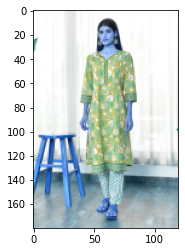

In [252]:
img_array = load_image(df_product.iloc[2].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [253]:
%%time
#import swifter

# Parallel apply
map_embeddings = df_product['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

https://cdn.shopify.com/s/files/1/0477/4992/2972/products/3_88a16d80-10e7-4a6c-88cd-19fa540bd2d6.jpg?v=1650786705
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/1_ba8cf0cc-5192-410d-88ef-79003da54375.jpg?v=1650366773
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/7_6c4c1f2e-ef1f-4b17-ac24-e3c21ab6f8ba.jpg?v=1650366887
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/5_28ed5be0-cddf-4ab8-a93e-720d30ea6bd0.jpg?v=1650366863
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/13_3f707b81-8012-41ac-b914-28f381a38080.jpg?v=1650368630
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/6_00f1ddfe-3098-4131-9616-9379610ed022.jpg?v=1650786650
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/30_2a5844f7-f320-46b4-9d5d-37210c432446.png?v=1635850960
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/51.png?v=1635850268
https://cdn.shopify.com/s/files/1/0477/4992/2972/products/32_cc3850c0-805e-4ec2-8b61-71adfa92b479.png?v=1635850520
https:/

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,20.586622,20.105677,12.107643,11.163271,9.893868,3.563166,13.861944,7.705441,6.954333,25.356749,...,15.097315,7.620796,4.541094,18.841145,16.909399,19.613054,6.633142,10.753406,10.191362,44.637928
1,8.793192,11.449055,5.026851,12.345861,11.886070,6.473016,16.804865,8.632877,5.341212,16.659184,...,12.424707,7.142735,3.940211,13.208349,8.349095,7.577753,6.331432,12.369025,13.631015,33.018913
2,15.140202,11.787365,17.924599,15.343410,9.063828,10.002635,14.093907,5.543682,4.738134,14.731933,...,10.063923,8.138678,3.960552,15.651771,13.358135,9.411799,8.749480,10.380952,9.866847,23.210533
3,18.949446,17.190123,17.870956,11.182445,5.408262,6.888535,6.955783,7.705895,6.576445,14.987641,...,10.293889,10.478212,5.527157,10.966778,9.482422,9.330651,9.242818,17.398350,7.511912,26.432198
4,10.955932,14.345816,14.079767,13.932893,6.422567,7.448464,15.348124,10.458452,9.020885,20.944908,...,11.918998,8.332247,5.201797,16.722898,14.752211,7.259862,10.836466,20.459419,17.988533,24.614832


In [254]:
df_embs = df_embs.reset_index(drop=True)
df_embs.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,20.586622,20.105677,12.107643,11.163271,9.893868,3.563166,13.861944,7.705441,6.954333,25.356749,...,15.097315,7.620796,4.541094,18.841145,16.909399,19.613054,6.633142,10.753406,10.191362,44.637928
1,8.793192,11.449055,5.026851,12.345861,11.886070,6.473016,16.804865,8.632877,5.341212,16.659184,...,12.424707,7.142735,3.940211,13.208349,8.349095,7.577753,6.331432,12.369025,13.631015,33.018913
2,15.140202,11.787365,17.924599,15.343410,9.063828,10.002635,14.093907,5.543682,4.738134,14.731933,...,10.063923,8.138678,3.960552,15.651771,13.358135,9.411799,8.749480,10.380952,9.866847,23.210533
3,18.949446,17.190123,17.870956,11.182445,5.408262,6.888535,6.955783,7.705895,6.576445,14.987641,...,10.293889,10.478212,5.527157,10.966778,9.482422,9.330651,9.242818,17.398350,7.511912,26.432198
4,10.955932,14.345816,14.079767,13.932893,6.422567,7.448464,15.348124,10.458452,9.020885,20.944908,...,11.918998,8.332247,5.201797,16.722898,14.752211,7.259862,10.836466,20.459419,17.988533,24.614832


In [255]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999857, 0.9213743 , 0.9266668 , 0.91472864],
       [0.9213743 , 0.999999  , 0.90986633, 0.9165    ],
       [0.9266668 , 0.90986633, 0.99999934, 0.9217516 ],
       [0.91472864, 0.9165    , 0.9217516 , 0.9999999 ]], dtype=float32)

In [256]:
sku = df_product['Variant SKU']
sku

0     HOD0772
1     HOD0766
2     HOD0760
3     HOD0754
4     HOD0748
5     HOD0742
6     HOD0727
7     HOD0721
8     HOD0715
9     HOD0709
10    HOD0703
11    HOD0697
12    HOD0691
13    HOD0685
14    HOD0679
15    HOD0673
16    HOD0667
17    HOD0663
18    HOD0659
Name: Variant SKU, dtype: object

In [257]:
# indexofsku = df_product[df_product['Variant SKU'] == 'HOD0659'].index
# indexofsku[0]

In [258]:
indices = pd.Series(range(len(df_product)), index=df_product.index)
indices

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
dtype: int64

In [259]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(inputsku, df_product, top_n = 5):
    idx = df_product[df_product['Variant SKU'] == inputsku].index
    sim_idx    = indices[idx[0]]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return sku.iloc[idx_rec], indices.iloc[idx_rec], idx_sim

In [260]:
# inputsku = 'HOD0691'
# get_recommender(inputsku, df_product, top_n = 5)

In [261]:
# # Recommendations
# sku, idx_rec, idx_sim = get_recommender(inputsku, df_product, top_n = 6)

# #index
# idx_ref = df_product[df_product['Variant SKU'] == inputsku].index
# idx_ref = idx_ref[0]

# # Plot
# #===================
# plt.imshow(cv2.cvtColor(load_image(df_product.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# # generation of a dictionary of (title, images)
# figures = {'im'+str(i): load_image(row.image) for i, row in df_product.loc[idx_rec].iterrows()}
# # plot of the images in a figure, with 2 rows and 3 columns
# plot_figures(figures, 2, 3)

In [262]:
finalantlist

['HOD0031',
 'HOD0635',
 'HOD0607',
 'HOD0575',
 'HOD0615',
 'HOD0579',
 'HOD0229',
 'HOD0037',
 'HOD0772',
 'HOD0754',
 'HOD0742',
 'HOD0271',
 'HOD0766',
 'HOD0079',
 'HOD0433',
 'HOD0748',
 'HOD0421',
 'HOD0157',
 'HOD0397',
 'HOD0007',
 'HOD0647',
 'HOD0217',
 'HOD0631',
 'HOD0103',
 'HOD0542']

In [278]:
def get_recommendation(inputsku):
    if inputsku not in finalantlist:
        outputsku, idx_rec, idx_sim = get_recommender(inputsku, df_product, top_n = 5)
        print(outputsku)
#         print("Inside")
    else:
        items = df_rec['consequents'].values

        item_list = []
        recommendationlist = []
        finalrecommendationlist = []
        for item in items:
            for sku in item:
                if sku not in item_list:
                    item_list.append(sku)
        recommendationlist = item_list[0:2]
        outputsku, idx_rec, idx_sim = get_recommender(inputsku, df_product, top_n = 5)
#         print(finalrecommendationlist)
        for i in outputsku:
            recommendationlist.append(i)
#         print(recommendationlist[0:5])
        
    # for not recommending the same item
        for x in recommendationlist:
            if x not in finalrecommendationlist:
                finalrecommendationlist.append(x)
        print(finalrecommendationlist[0:5])

In [279]:
# inputsku = 'HOD0691'
inputsku = 'HOD0772'
get_recommendation(inputsku)

['HOD0007', 'HOD0217', 'HOD0760', 'HOD0766', 'HOD0748']
